In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
shoppers_data = pd.read_csv('online_shoppers_intention.csv')


In [3]:
online_data = pd.read_csv('onlineshopping.csv')


In [4]:
print(online_data.head())
print(shoppers_data.head())

   Unnamed: 0  CustomerID Gender Location  Tenure_Months  Transaction_ID  \
0           0     17850.0      M  Chicago           12.0         16679.0   
1           1     17850.0      M  Chicago           12.0         16680.0   
2           2     17850.0      M  Chicago           12.0         16696.0   
3           3     17850.0      M  Chicago           12.0         16699.0   
4           4     17850.0      M  Chicago           12.0         16700.0   

  Transaction_Date     Product_SKU  \
0       2019-01-01  GGOENEBJ079499   
1       2019-01-01  GGOENEBJ079499   
2       2019-01-01  GGOENEBQ078999   
3       2019-01-01  GGOENEBQ079099   
4       2019-01-01  GGOENEBJ079499   

                                 Product_Description Product_Category  ...  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   
2             Nest Cam Outdoor Security Camera - USA         Nest-USA  ...   
3 

In [5]:
print(online_data.columns)
print(shoppers_data.columns)

Index(['Unnamed: 0', 'CustomerID', 'Gender', 'Location', 'Tenure_Months',
       'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Date', 'Offline_Spend',
       'Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [11]:
# Select relevant columns from online_data
online_data_reduced = online_data[['CustomerID', 'Gender', 'Transaction_ID', 
                                    'Transaction_Date', 'Quantity', 'Avg_Price', 
                                    'Delivery_Charges', 'GST', 
                                    'Offline_Spend', 'Online_Spend', 
                                    'Coupon_Code', 'Discount_pct']]

In [13]:
# Select relevant columns from shoppers_data
shoppers_data_reduced = shoppers_data[[ 'Administrative', 
                                        'Administrative_Duration', 'Informational', 
                                        'Informational_Duration', 'ProductRelated', 
                                        'ProductRelated_Duration', 'BounceRates', 
                                        'ExitRates', 'PageValues', 'SpecialDay', 
                                        'Month', 'OperatingSystems', 'Browser', 
                                        'Region', 'TrafficType', 'VisitorType', 
                                        'Weekend', 'Revenue']]


In [15]:
# Optimize data types
online_data_reduced['Gender'] = online_data_reduced['Gender'].astype('category')
shoppers_data_reduced['Administrative'] = shoppers_data_reduced['Administrative'].astype('float32')
shoppers_data_reduced['Revenue'] = shoppers_data_reduced['Revenue'].astype('category')  # Adjust as needed

C:\Users\gillb\AppData\Local\Temp\ipykernel_21380\1949381729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_data_reduced['Gender'] = online_data_reduced['Gender'].astype('category')


In [17]:
# Define columns to drop
columns_to_drop = [
    'Unnamed: 0',
    'BounceRates',
    'ExitRates',
    'VisitorType',
    'TrafficType'
]

In [19]:
combined_data = pd.concat([online_data, shoppers_data], axis=0, ignore_index=True)

In [21]:
print(combined_data.head())
print(combined_data.info())


   Unnamed: 0  CustomerID Gender Location  Tenure_Months  Transaction_ID  \
0         0.0     17850.0      M  Chicago           12.0         16679.0   
1         1.0     17850.0      M  Chicago           12.0         16680.0   
2         2.0     17850.0      M  Chicago           12.0         16696.0   
3         3.0     17850.0      M  Chicago           12.0         16699.0   
4         4.0     17850.0      M  Chicago           12.0         16700.0   

  Transaction_Date     Product_SKU  \
0       2019-01-01  GGOENEBJ079499   
1       2019-01-01  GGOENEBJ079499   
2       2019-01-01  GGOENEBQ078999   
3       2019-01-01  GGOENEBQ079099   
4       2019-01-01  GGOENEBJ079499   

                                 Product_Description Product_Category  ...  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   
2             Nest Cam Outdoor Security Camera - USA         Nest-USA  ...   
3 

In [23]:
missing_values = combined_data.isnull().sum()
print(missing_values[missing_values > 0])

Unnamed: 0                 12330
CustomerID                 12361
Gender                     12361
Location                   12361
Tenure_Months              12361
Transaction_ID             12361
Transaction_Date           12361
Product_SKU                12361
Product_Description        12361
Product_Category           12330
Quantity                   12361
Avg_Price                  12361
Delivery_Charges           12361
Coupon_Status              12361
GST                        12361
Date                       12361
Offline_Spend              12361
Online_Spend               12361
Coupon_Code                12730
Discount_pct               12730
Administrative             52955
Administrative_Duration    52955
Informational              52955
Informational_Duration     52955
ProductRelated             52955
ProductRelated_Duration    52955
BounceRates                52955
ExitRates                  52955
PageValues                 52955
SpecialDay                 52955
OperatingS

In [25]:
# Drop columns with a high number of missing values
columns_to_drop = ['Administrative_Duration', 'Informational', 
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'SpecialDay', 
    'OperatingSystems', 'Browser', 'Region', 'TrafficType', 
    'VisitorType', 'Weekend', 
]
combined_data_cleaned = combined_data.drop(columns=columns_to_drop)


In [27]:
# Fill missing values in relevant columns
combined_data_cleaned['Coupon_Code'].fillna('No Coupon', inplace=True)
combined_data_cleaned['Discount_pct'].fillna(0, inplace=True)

In [29]:
# Check the cleaned DataFrame
print(combined_data_cleaned.info())
print(combined_data_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65285 entries, 0 to 65284
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  float64
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [31]:
combined_data_cleaned.drop(columns=['Unnamed: 0', 'CustomerID'], inplace=True)


In [33]:
combined_data_cleaned['Transaction_Date'] = pd.to_datetime(combined_data_cleaned['Transaction_Date'])
combined_data_cleaned['Date'] = pd.to_datetime(combined_data_cleaned['Date'])

In [35]:

print(combined_data_cleaned.describe())

       Tenure_Months  Transaction_ID               Transaction_Date  \
count   52924.000000    52924.000000                          52924   
mean       26.127995    32409.825675  2019-07-05 19:16:09.450533120   
min         2.000000    16679.000000            2019-01-01 00:00:00   
25%        15.000000    25384.000000            2019-04-12 00:00:00   
50%        27.000000    32625.500000            2019-07-13 00:00:00   
75%        37.000000    39126.250000            2019-09-27 00:00:00   
max        50.000000    48497.000000            2019-12-31 00:00:00   
std        13.478285     8648.668977                            NaN   

           Quantity     Avg_Price  Delivery_Charges           GST  \
count  52924.000000  52924.000000      52924.000000  52924.000000   
mean       4.497638     52.237646         10.517630      0.137462   
min        1.000000      0.390000          0.000000      0.050000   
25%        1.000000      5.700000          6.000000      0.100000   
50%        1.00

In [37]:
print(combined_data_cleaned.info())
print(combined_data_cleaned.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65285 entries, 0 to 65284
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Gender               52924 non-null  object        
 1   Location             52924 non-null  object        
 2   Tenure_Months        52924 non-null  float64       
 3   Transaction_ID       52924 non-null  float64       
 4   Transaction_Date     52924 non-null  datetime64[ns]
 5   Product_SKU          52924 non-null  object        
 6   Product_Description  52924 non-null  object        
 7   Product_Category     52955 non-null  object        
 8   Quantity             52924 non-null  float64       
 9   Avg_Price            52924 non-null  float64       
 10  Delivery_Charges     52924 non-null  float64       
 11  Coupon_Status        52924 non-null  object        
 12  GST                  52924 non-null  float64       
 13  Date                 52924 non-

In [39]:
missing_values = combined_data_cleaned.isnull().sum()
print(missing_values[missing_values > 0])


Gender                 12361
Location               12361
Tenure_Months          12361
Transaction_ID         12361
Transaction_Date       12361
Product_SKU            12361
Product_Description    12361
Product_Category       12330
Quantity               12361
Avg_Price              12361
Delivery_Charges       12361
Coupon_Status          12361
GST                    12361
Date                   12361
Offline_Spend          12361
Online_Spend           12361
Administrative         52955
PageValues             52955
Revenue                52955
dtype: int64


In [41]:
# Impute missing values for categorical columns with a placeholder
combined_data_cleaned['Product_Category'].fillna('Unknown', inplace=True)


In [43]:
# For numeric columns, use median or mean
for column in ['Avg_Price', 'Delivery_Charges', 'GST', 'Offline_Spend', 'Online_Spend']:
    combined_data_cleaned[column].fillna(combined_data_cleaned[column].median(), inplace=True)


In [45]:
# Check for remaining missing values
remaining_missing = combined_data_cleaned.isnull().sum()
print(remaining_missing[remaining_missing > 0])

Gender                 12361
Location               12361
Tenure_Months          12361
Transaction_ID         12361
Transaction_Date       12361
Product_SKU            12361
Product_Description    12361
Quantity               12361
Coupon_Status          12361
Date                   12361
Administrative         52955
PageValues             52955
Revenue                52955
dtype: int64


In [47]:
# Impute missing values for categorical columns with a placeholder or mode
combined_data_cleaned['Gender'].fillna('Unknown', inplace=True)
combined_data_cleaned['Location'].fillna('Unknown', inplace=True)
combined_data_cleaned['Coupon_Status'].fillna('Not Specified', inplace=True)


In [49]:
# For 'Transaction_Date' and 'Date', you could set a placeholder
combined_data_cleaned['Transaction_Date'].fillna('Unknown Date', inplace=True)
combined_data_cleaned['Date'].fillna('Unknown Date', inplace=True)


C:\Users\gillb\AppData\Local\Temp\ipykernel_21380\975238994.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown Date' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  combined_data_cleaned['Transaction_Date'].fillna('Unknown Date', inplace=True)
C:\Users\gillb\AppData\Local\Temp\ipykernel_21380\975238994.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown Date' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  combined_data_cleaned['Date'].fillna('Unknown Date', inplace=True)


In [51]:
# For 'Quantity', fill with median
combined_data_cleaned['Quantity'].fillna(combined_data_cleaned['Quantity'].median(), inplace=True)

# For 'Administrative' and 'PageValues', use median
combined_data_cleaned['Administrative'].fillna(combined_data_cleaned['Administrative'].median(), inplace=True)
combined_data_cleaned['PageValues'].fillna(combined_data_cleaned['PageValues'].median(), inplace=True)

# For 'Revenue', you can choose to fill with a placeholder or consider the mean
combined_data_cleaned['Revenue'].fillna('Unknown Revenue', inplace=True)

# Check for remaining missing values
remaining_missing = combined_data_cleaned.isnull().sum()
print(remaining_missing[remaining_missing > 0])

Tenure_Months          12361
Transaction_ID         12361
Product_SKU            12361
Product_Description    12361
dtype: int64


In [53]:
# Fill missing values for Tenure_Months with median
combined_data_cleaned['Tenure_Months'].fillna(combined_data_cleaned['Tenure_Months'].median(), inplace=True)

# Handle missing Transaction_IDs
combined_data_cleaned['Transaction_ID'].fillna(-1, inplace=True)  # or drop rows with missing IDs
# Alternatively: combined_data_cleaned.dropna(subset=['Transaction_ID'], inplace=True)

# Fill missing Product_SKU with a placeholder
combined_data_cleaned['Product_SKU'].fillna('Unknown SKU', inplace=True)

# Fill missing Product_Description with a placeholder
combined_data_cleaned['Product_Description'].fillna('No Description', inplace=True)

In [55]:
# Check for remaining missing values
remaining_missing = combined_data_cleaned.isnull().sum()
print(remaining_missing[remaining_missing > 0])

Series([], dtype: int64)


In [57]:
# Summary statistics
print(combined_data_cleaned.describe())


       Tenure_Months  Transaction_ID      Quantity     Avg_Price  \
count   65285.000000    65285.000000  65285.000000  65285.000000   
mean       26.293099    26273.190672      3.835399     45.563890   
std        12.140191    14895.448444     18.153381     59.261012   
min         2.000000       -1.000000      1.000000      0.390000   
25%        18.000000    19312.000000      1.000000      8.990000   
50%        27.000000    29268.000000      1.000000     16.990000   
75%        34.000000    37478.000000      2.000000     79.000000   
max        50.000000    48497.000000    900.000000    355.740000   

       Delivery_Charges           GST  Offline_Spend  Online_Spend  \
count      65285.000000  65285.000000   65285.000000  65285.000000   
mean           9.662267      0.145516    2862.928697   1882.650197   
std           17.624268      0.044498     845.480168    726.929873   
min            0.000000      0.050000     500.000000    320.250000   
25%            6.000000      0.100000

In [59]:
# Outlier detection: Check for negative Transaction_ID
negative_transaction_ids = combined_data_cleaned[combined_data_cleaned['Transaction_ID'] < 0]
print(negative_transaction_ids)

        Gender Location  Tenure_Months  Transaction_ID Transaction_Date  \
52924  Unknown  Unknown           27.0            -1.0     Unknown Date   
52925  Unknown  Unknown           27.0            -1.0     Unknown Date   
52926  Unknown  Unknown           27.0            -1.0     Unknown Date   
52927  Unknown  Unknown           27.0            -1.0     Unknown Date   
52928  Unknown  Unknown           27.0            -1.0     Unknown Date   
...        ...      ...            ...             ...              ...   
65280  Unknown  Unknown           27.0            -1.0     Unknown Date   
65281  Unknown  Unknown           27.0            -1.0     Unknown Date   
65282  Unknown  Unknown           27.0            -1.0     Unknown Date   
65283  Unknown  Unknown           27.0            -1.0     Unknown Date   
65284  Unknown  Unknown           27.0            -1.0     Unknown Date   

       Product_SKU Product_Description Product_Category  Quantity  Avg_Price  \
52924  Unknown SKU 

In [61]:
combined_data_cleaned = combined_data_cleaned[combined_data_cleaned['Transaction_ID'] >= 0]

In [63]:
print(combined_data_cleaned.isnull().sum())

Gender                 0
Location               0
Tenure_Months          0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
GST                    0
Date                   0
Offline_Spend          0
Online_Spend           0
Month                  0
Coupon_Code            0
Discount_pct           0
Administrative         0
PageValues             0
Revenue                0
dtype: int64


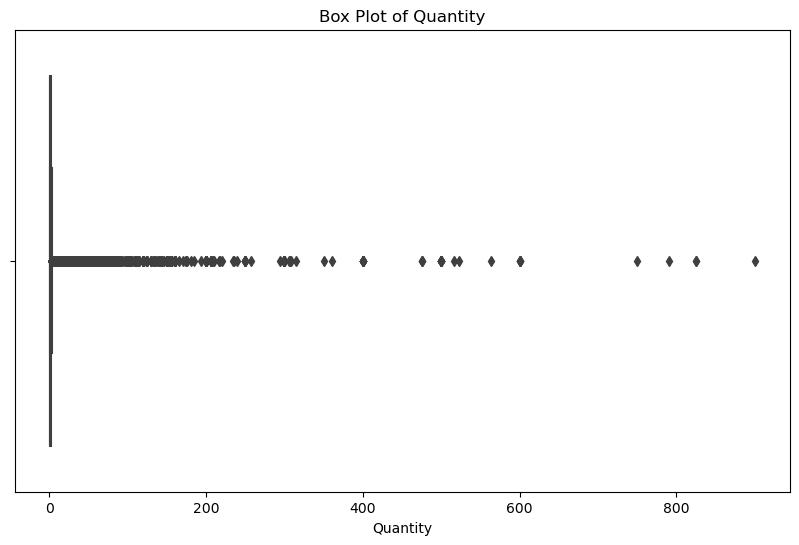

In [65]:
# Box plot for Quantity
plt.figure(figsize=(10, 6))
sns.boxplot(x=combined_data_cleaned['Quantity'])
plt.title('Box Plot of Quantity')
plt.show()

C:\Users\gillb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


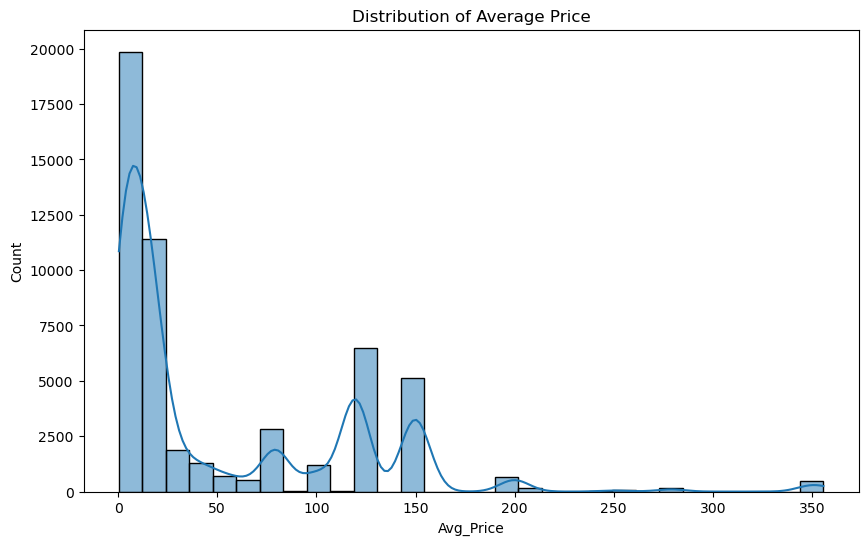

In [67]:
# Example: Histogram for Average Price
plt.figure(figsize=(10, 6))
sns.histplot(combined_data_cleaned['Avg_Price'], bins=30, kde=True)
plt.title('Distribution of Average Price')
plt.show()

In [68]:
# Summary statistics
print(combined_data_cleaned.describe())

       Tenure_Months  Transaction_ID      Quantity     Avg_Price  \
count   52924.000000    52924.000000  52924.000000  52924.000000   
mean       26.127995    32409.825675      4.497638     52.237646   
std        13.478285     8648.668977     20.104711     64.006882   
min         2.000000    16679.000000      1.000000      0.390000   
25%        15.000000    25384.000000      1.000000      5.700000   
50%        27.000000    32625.500000      1.000000     16.990000   
75%        37.000000    39126.250000      2.000000    102.130000   
max        50.000000    48497.000000    900.000000    355.740000   

       Delivery_Charges           GST  Offline_Spend  Online_Spend  \
count      52924.000000  52924.000000   52924.000000  52924.000000   
mean          10.517630      0.137462    2830.914141   1893.109119   
std           19.475613      0.045825     936.154247    807.014092   
min            0.000000      0.050000     500.000000    320.250000   
25%            6.000000      0.100000

C:\Users\gillb\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


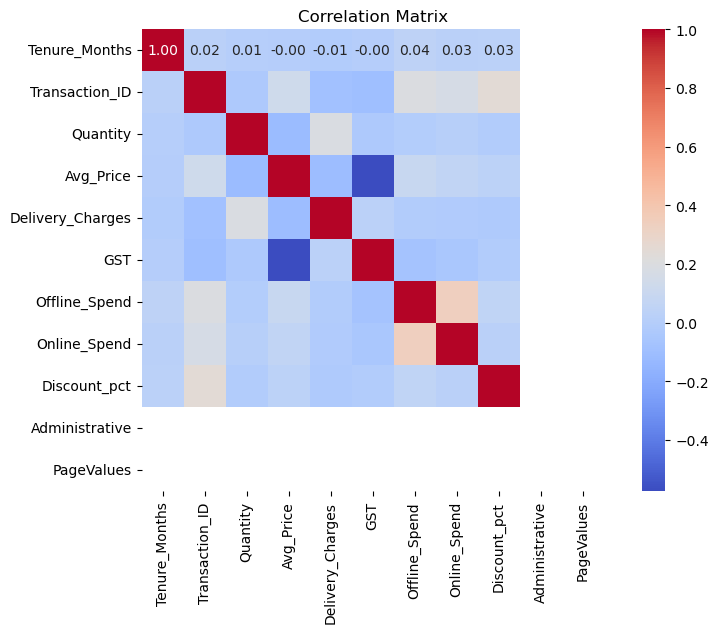

In [71]:
# Select only numeric columns for correlation
numeric_data = combined_data_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [72]:
# One-hot encoding for categorical variables
combined_data_cleaned = pd.get_dummies(combined_data_cleaned, columns=['Gender', 'Location', 'Product_Category'], drop_first=True)

In [75]:
# Convert Transaction_Date to datetime
combined_data_cleaned['Transaction_Date'] = pd.to_datetime(combined_data_cleaned['Transaction_Date'], errors='coerce')

# Create a new feature: month from Transaction_Date
combined_data_cleaned['Transaction_Month'] = combined_data_cleaned['Transaction_Date'].dt.month

# Create a new feature: Total Spend
combined_data_cleaned['Total_Spend'] = combined_data_cleaned['Offline_Spend'] + combined_data_cleaned['Online_Spend']

In [77]:
# Binning Tenure_Months into categories
bins = [0, 12, 24, 36, 48, 60]
labels = ['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years']
combined_data_cleaned['Tenure_Category'] = pd.cut(combined_data_cleaned['Tenure_Months'], bins=bins, labels=labels)

In [79]:
from sklearn.preprocessing import StandardScaler

# Assuming 'combined_data_cleaned' is your DataFrame
scaler = StandardScaler()

# Select the numerical features to scale
numerical_features = ['Quantity', 'Avg_Price', 'Delivery_Charges', 'GST', 'Total_Spend']

# Fit and transform the data
combined_data_cleaned[numerical_features] = scaler.fit_transform(combined_data_cleaned[numerical_features])

In [81]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [83]:
# Initialize the scaler
scaler = StandardScaler()

In [85]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(combined_data_cleaned[numerical_features])
    inertia.append(kmeans.inertia_)

C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\clust

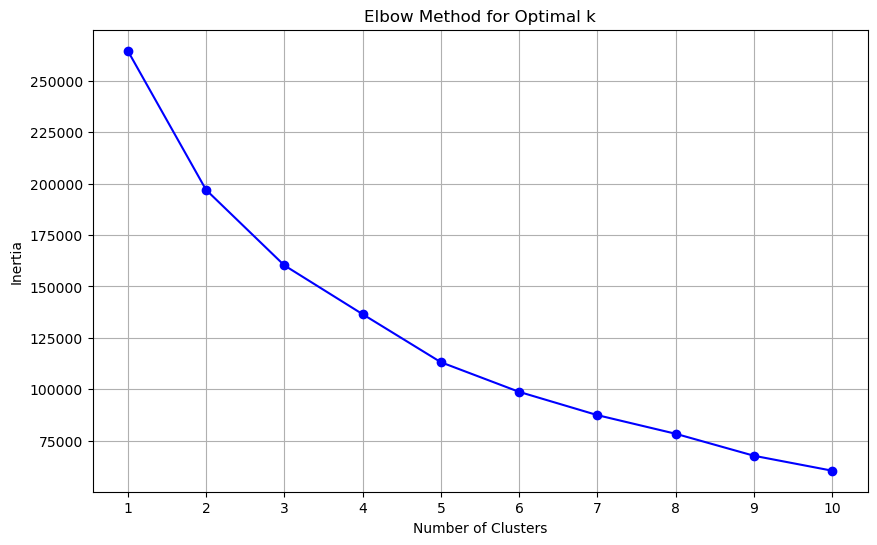

In [86]:
# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.grid()
plt.show()

In [87]:
# Choose the number of clusters based on the Elbow method, e.g., k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
combined_data_cleaned['Cluster'] = kmeans.fit_predict(combined_data_cleaned[numerical_features])

C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


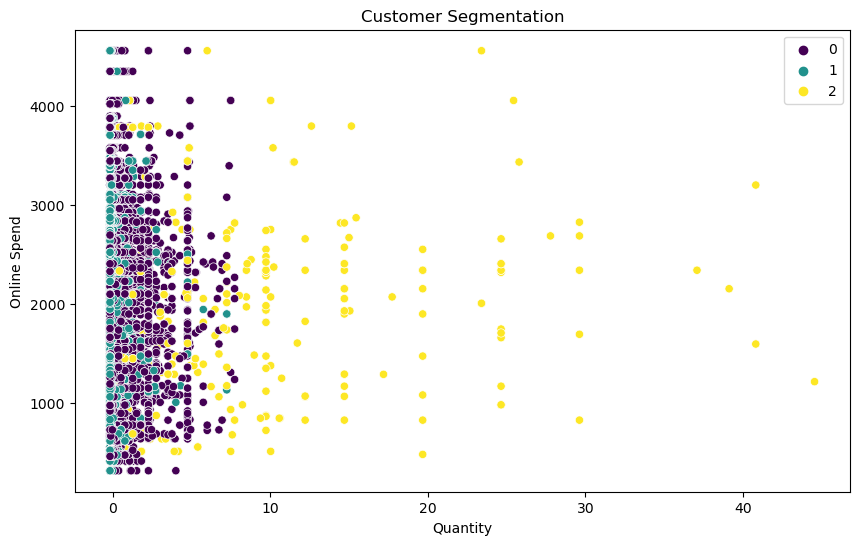

In [88]:
# Visualize the clusters using selected features for better interpretation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data_cleaned, x='Quantity', y='Online_Spend', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Quantity')
plt.ylabel('Online Spend')
plt.legend()
plt.show()

In [89]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(combined_data_cleaned[numerical_features])
combined_data_cleaned['PCA1'] = reduced_features[:, 0]
combined_data_cleaned['PCA2'] = reduced_features[:, 1]


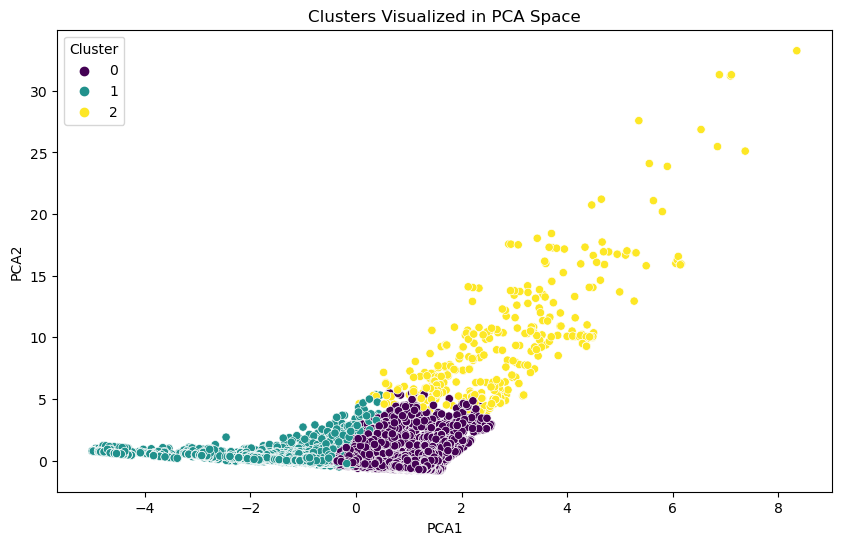

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=combined_data_cleaned, palette='viridis')
plt.title('Clusters Visualized in PCA Space')
plt.show()

In [91]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_data_cleaned[numerical_features])


In [92]:
from sklearn.metrics import silhouette_score
combined_data_cleaned['Cluster'] = kmeans.labels_
# Calculate silhouette score
score = silhouette_score(scaled_features, combined_data_cleaned['Cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.40146112328587336


In [93]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_features, combined_data_cleaned['Cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.40146112328587336


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [95]:
# Create a combined target variable for total spend
combined_data_cleaned['Total_Spend'] = combined_data_cleaned['Offline_Spend'] + combined_data_cleaned['Online_Spend']
y = combined_data_cleaned['Total_Spend']

In [98]:
X = combined_data_cleaned[['Tenure_Months', 'Transaction_ID', 'Quantity', 
                            'Avg_Price', 'Delivery_Charges', 'GST', 
                            'Discount_pct', 'Administrative', 
                            'Offline_Spend', 'Online_Spend', 'PageValues']]


In [100]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [101]:
# Initialize and fit the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [102]:
# Predict on the test set
y_pred = model.predict(X_test)


In [103]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 27.71100058806836


In [104]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

In [105]:
# Create a base model
rf = RandomForestRegressor(random_state=42)

# Instantiate the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Predict with the best estimator
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the tuned model
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Mean Squared Error of Tuned Model: {mse_best}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found:  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error of Tuned Model: 25.172282763082528


In [124]:
# Initialize and fit the RandomForestRegressor
rf = RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=5)

In [125]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

In [128]:
# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

             Feature    Importance
8      Offline_Spend  5.614712e-01
9       Online_Spend  4.304197e-01
1     Transaction_ID  7.089847e-03
6       Discount_pct  9.972468e-04
0      Tenure_Months  2.096106e-05
3          Avg_Price  6.484091e-07
4   Delivery_Charges  3.068833e-07
2           Quantity  1.946502e-15
5                GST  1.709396e-15
7     Administrative  0.000000e+00
10        PageValues  0.000000e+00


In [130]:
# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

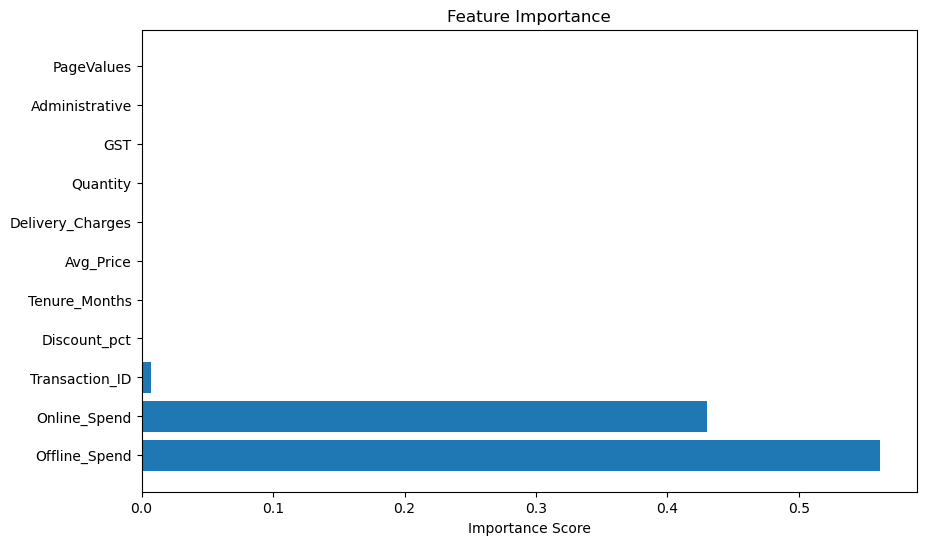

In [132]:
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.show()


In [134]:
from sklearn.neural_network import MLPRegressor


In [136]:
# Train the model
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)



MLPRegressor(max_iter=1000, random_state=42)

In [137]:
# Make predictions
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f'Neural Network Mean Squared Error: {mse_nn}')

Neural Network Mean Squared Error: 2.9123995492294106


In [173]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


In [175]:
# Initialize and fit the Lasso regression model with cross-validation for alpha tuning
lasso_model = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5)
lasso_model.fit(X_train, y_train)


LassoCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5)

In [177]:
# Make predictions
y_pred_lasso = lasso_model.predict(X_test)


In [179]:
# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = mse_lasso ** 0.5

In [181]:
print(f"Lasso Mean Squared Error: {mse_lasso:.4f}")
print(f"Lasso Root Mean Squared Error: {rmse_lasso:.4f}")
print(f"Lasso R-squared: {r2_lasso:.4f}")

Lasso Mean Squared Error: 0.0002
Lasso Root Mean Squared Error: 0.0123
Lasso R-squared: 1.0000


In [183]:
# Perform cross-validation
cv_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()  # Negate to get positive MSE

print(f"Cross-Validated Mean Squared Error: {cv_mse:.4f}")

Cross-Validated Mean Squared Error: 0.0000


In [185]:
# Print coefficients
coefficients = pd.DataFrame(lasso_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                  Coefficient
Tenure_Months        0.000000
Transaction_ID       0.000000
Quantity            -0.000000
Avg_Price           -0.000000
Delivery_Charges    -0.000000
GST                 -0.000000
Discount_pct         0.000000
Administrative       0.000000
Offline_Spend      933.674617
Online_Spend       804.762650
PageValues           0.000000
